In [ ]:
#IMPORT LIBRARIES
import itertools
import numpy as np
import pandas as pd
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import pickle

In [ ]:
file_path = 'rt.movie_info.tsv.gz'

df = pd.read_csv(file_path, sep='\t', compression='gzip', encoding='ISO-8859-1')

df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
# Data Understanding

In [ ]:
#Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
# Data description
df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [ ]:
#DATA CLEANING

In [ ]:
# Checking for missing values
df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [ ]:
# Checking for unique values (e.g., genre)
df['genre'].unique()


array(['Action and Adventure|Classics|Drama',
       'Drama|Science Fiction and Fantasy',
       'Drama|Musical and Performing Arts', 'Drama|Mystery and Suspense',
       'Drama|Romance', 'Drama|Kids and Family', 'Comedy', 'Drama',
       'Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy',
       nan, 'Documentary', 'Documentary|Special Interest',
       'Classics|Comedy|Drama', 'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Comedy|Drama',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Musical and Performing Arts',
       'Classics|Comedy|Musical and Performing Arts|Romance',
       'Action and Adventure|Drama|Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense',
       'Art House and International|Classics|Horror|Mystery and Suspense',
       'Horror',
       'Action and Adventure|Classics|Drama|Mystery and Suspense',
   

In [ ]:
# Checking column names
df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [ ]:
# Dropping rows with null values
df_cleaned = df.dropna()

# Displaying cleaned data
df_cleaned.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [ ]:
# Dropping rows with null values
df.dropna(inplace=True)

# Display the data
df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [ ]:
# Checking for missing values
df.isnull().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [ ]:
# DATA ANALYSIS

In [ ]:
# Get basic statistics for numeric columns
df.describe()

,id
count,235.000000
mean,1010.217021
std,578.522979
min,3.000000
25%,488.500000
50%,1044.000000
75%,1526.000000
max,1985.000000


In [ ]:
#CORRELATION TEST

In [ ]:
# Pearson correlation
correlation = df_clean['box_office'].corr(df_clean['runtime'])
print(f"Pearson correlation between box office and runtime: {correlation}")


Pearson correlation between box office and runtime: 0.31215657079573966


In [ ]:
# This is a positive correlation meaning: as the runtime of a movie increases,there is a tendency for box office earnings to increase
#However, this relationship is not very strong.
#0.312 is a moderate positive correlation, meaning runtime might play a role in box office earnings,
#but other factors (like genre, marketing, director, etc.) most likely have a stronger influence.

In [ ]:
#REGRESSION ANALYSIS

In [ ]:
import statsmodels.api as sm

# Defining the variables
X = df_clean['runtime']  # Independent variable
y = df_clean['box_office']  # Dependent variable

# Add a constant (for the intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Printing the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     25.16
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.05e-06
Time:                        19:01:43   Log-Likelihood:                -4539.8
No. Observations:                 235   AIC:                             9084.
Df Residuals:                     233   BIC:                             9091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.295e+07   2.32e+07     -3.139      0.0

In [ ]:
#INTERPRETATION
#R-squared: 0.097
#This means that only about 9.7% of the variation in box office earnings can be explained by runtime.
#This is a relatively low value, suggesting that runtime alone doesn't have a strong predictive power over box office earnings.

#Adj. R-squared: 0.094
#The adjusted R-squared is slightly lower than the R-squared, taking into account the number of predictors.
#This confirms that the model is not capturing much of the variability in the data.

In [ ]:
#P-value for runtime: 0.000
#This is highly significant, meaning that runtime has a statistically significant impact on box office earnings.
#The p-value is much smaller than the commonly used significance level of 0.05.

In [ ]:
#Skew and Kurtosis:
#The values of skew (2.023) and kurtosis (8.211) suggest that the residuals are not perfectly symmetric and have heavy tails,
#which further implies that the model might not be capturing the data well.

In [ ]:
#Practical Implication:
#Whereas a longer runtime might lead to slightly higher box office earnings,
#it is not a reliable or strong indicator of movie success on its own.

In [ ]:

# Defining the independent (X) and dependent (y) variables
X = df_clean['runtime']
y = df_clean['box_office']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Checking the p-value for runtime
p_value_runtime = model.pvalues['runtime']
print(f"P-value for runtime: {p_value_runtime}")

# Hypothesis testing
alpha = 0.05
if p_value_runtime < alpha:
    print("Reject the null hypothesis: Runtime has a significant effect on box office earnings.")
else:
    print("Fail to reject the null hypothesis: No significant effect of runtime on box office earnings.")


P-value for runtime: 1.0485505908237132e-06
Reject the null hypothesis: Runtime has a significant effect on box office earnings.


In [ ]:
#Conclusion
#Therefore, we reject the null hypothesis and conclude that runtime does have
#a statistically significant effect on box office earnings

In [ ]:
#VISUALIZATION

In [ ]:
#Scatter plot

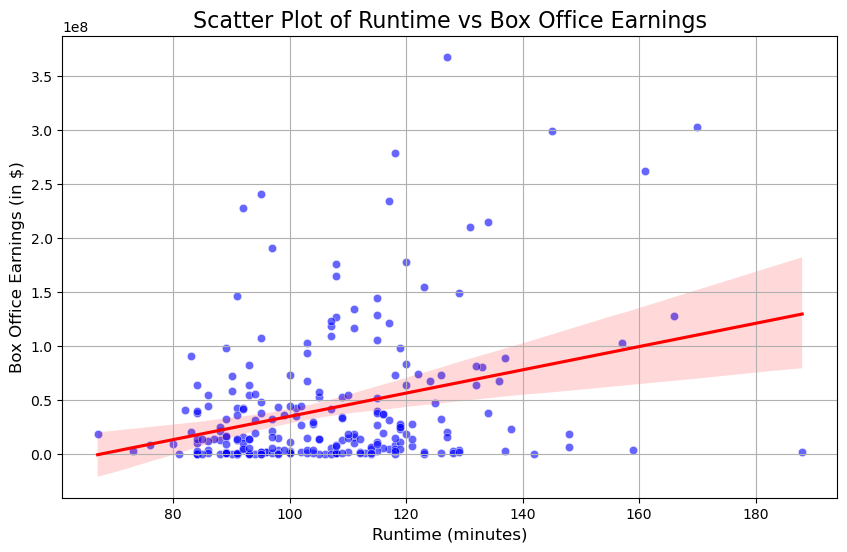

In [ ]:

# Scatter plot of runtime vs box office earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='runtime', y='box_office', color='blue', alpha=0.6)

# Adding a regression line
sns.regplot(data=df_clean, x='runtime', y='box_office', scatter=False, color='red')

# Customize the plot
plt.title('Scatter Plot of Runtime vs Box Office Earnings', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Box Office Earnings (in $)', fontsize=12)
plt.grid(True)

# Show plot
plt.show()


In [ ]:
#Box Plot

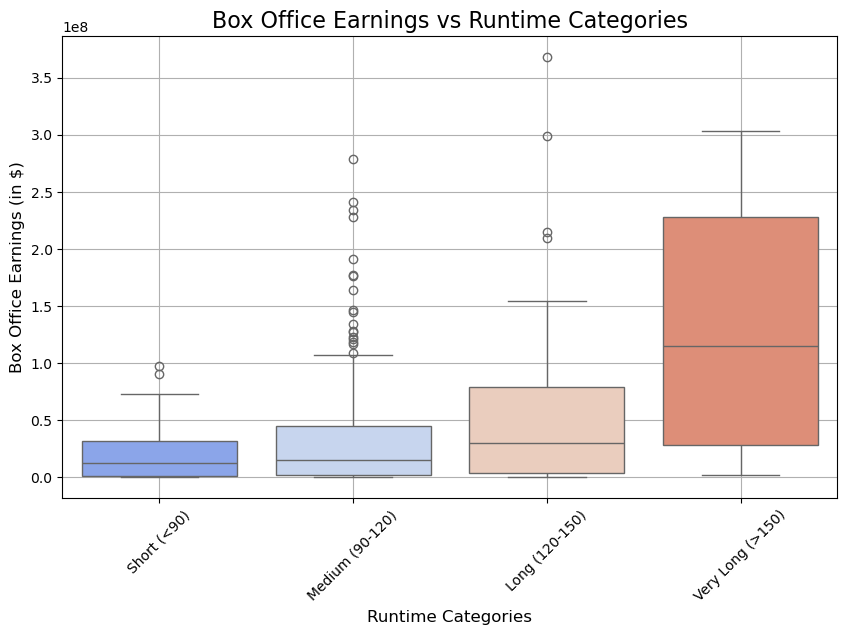

In [ ]:
# Define bins for runtime (e.g., short, medium, long)
bins = [0, 90, 120, 150, np.inf]
labels = ['Short (<90)', 'Medium (90-120)', 'Long (120-150)', 'Very Long (>150)']
df_clean['runtime_category'] = pd.cut(df_clean['runtime'], bins=bins, labels=labels)

# Box plot of Box Office vs Runtime Categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='runtime_category', y='box_office', palette='coolwarm')

# Customize the plot
plt.title('Box Office Earnings vs Runtime Categories', fontsize=16)
plt.xlabel('Runtime Categories', fontsize=12)
plt.ylabel('Box Office Earnings (in $)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [ ]:
#Pair Plot

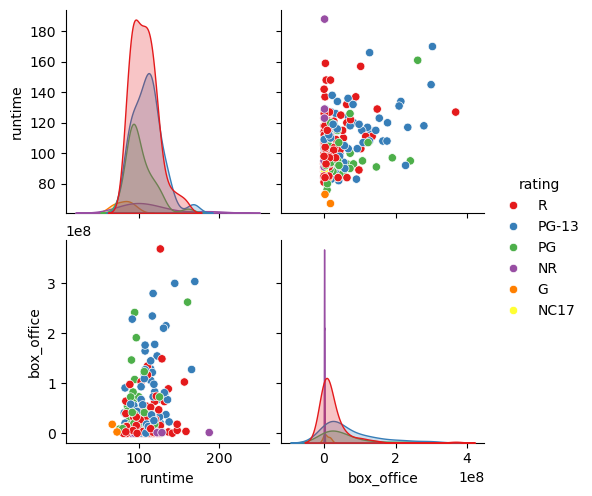

In [ ]:
# Pair plot of runtime, box office, and other variables (e.g., rating)
sns.pairplot(df_clean[['runtime', 'box_office', 'rating']], hue='rating', palette='Set1')

# Show plot
plt.show()


In [ ]:
# WHICH GENRE HAD THE HIGHEST BOX OFFICE EARNINGS?

In [ ]:
# extract the first genre
df_clean['primary_genre'] = df_clean['genre'].str.split('|').str[0]

# Group by primary genre and calculate the average box office earnings
genre_box_office = df_clean.groupby('primary_genre')['box_office'].mean().sort_values(ascending=False)

# Display the top genres with the highest average box office earnings
print(genre_box_office)


primary_genre
Science Fiction and Fantasy    1.908711e+08
Kids and Family                1.319315e+08
Action and Adventure           7.606785e+07
Animation                      4.127259e+07
Comedy                         4.020952e+07
Drama                          2.864056e+07
Horror                         2.028152e+07
Art House and International    1.432253e+06
Documentary                    3.392757e+05
Name: box_office, dtype: float64


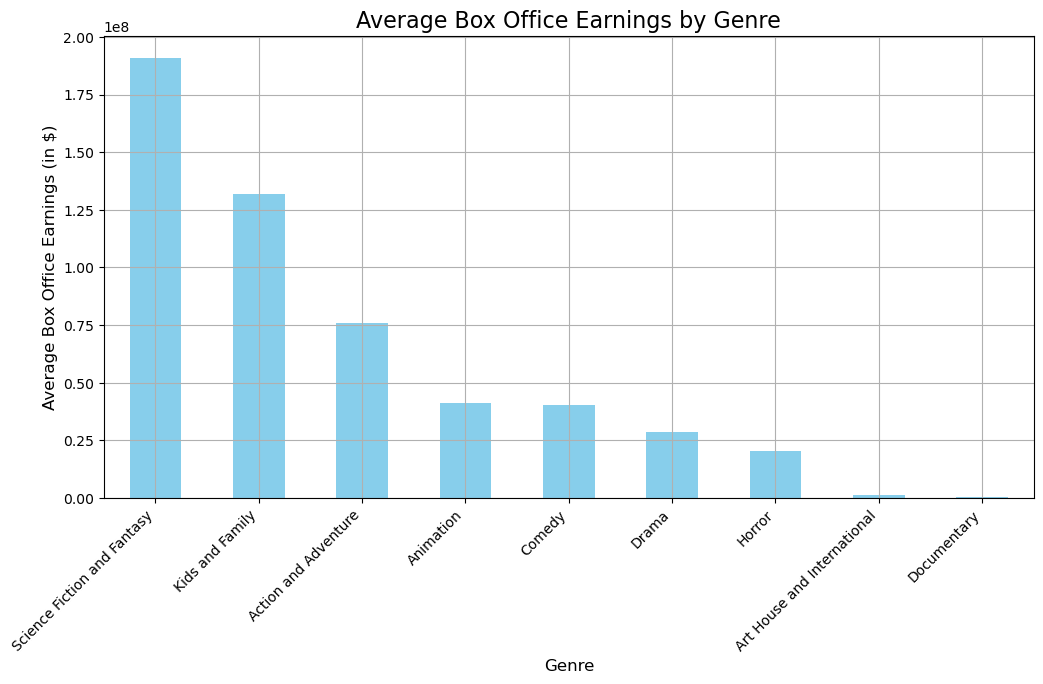

In [ ]:

# Plot the results
plt.figure(figsize=(12, 6))
genre_box_office.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Box Office Earnings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Box Office Earnings (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# WHICH MOVIE RATING HAD THE HIGHEST BOX OFFICE EARNINGS?

In [ ]:
# Group by movie rating and calculate the average box office earnings
rating_box_office = df_clean.groupby('rating')['box_office'].mean().sort_values(ascending=False)

# Display the average box office earnings for each rating
print(rating_box_office)


rating
PG-13    6.872359e+07
PG       5.289280e+07
R        2.394827e+07
G        7.402788e+06
NC17     1.260219e+06
NR       6.376923e+05
Name: box_office, dtype: float64


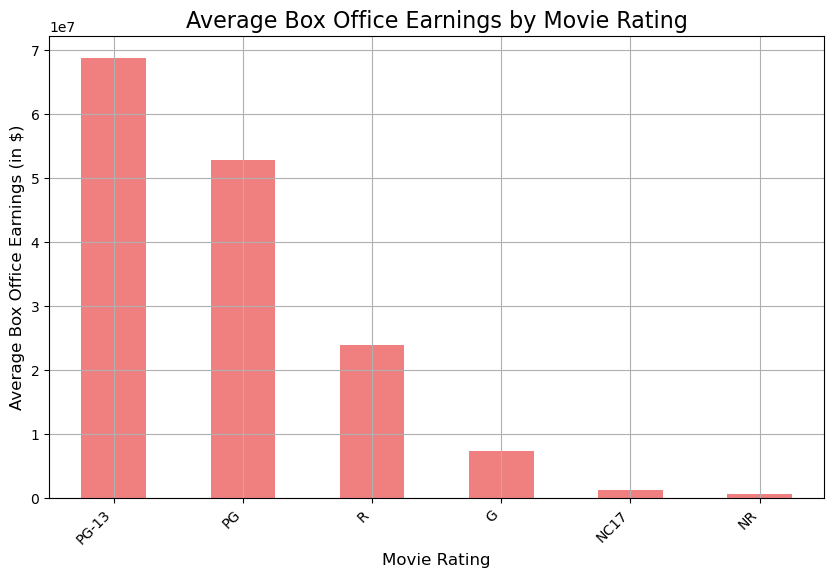

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))
rating_box_office.plot(kind='bar', color='lightcoral')

# Customize the plot
plt.title('Average Box Office Earnings by Movie Rating', fontsize=16)
plt.xlabel('Movie Rating', fontsize=12)
plt.ylabel('Average Box Office Earnings (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# WHICH DIRECTOR HAD THE HIGHEST BOX OFFICE EARNINGS?

In [ ]:
# Group by director and calculate the average box office earnings
director_box_office = df_clean.groupby('director')['box_office'].mean().sort_values(ascending=False)

# Display the directors with the highest average box office earnings
print(director_box_office.head())


director
Mel Gibson          368000000.0
Peter Jackson       303001229.0
Chris Columbus      261835892.0
Joel Zwick          241250669.0
Steven Spielberg    234141872.0
Name: box_office, dtype: float64


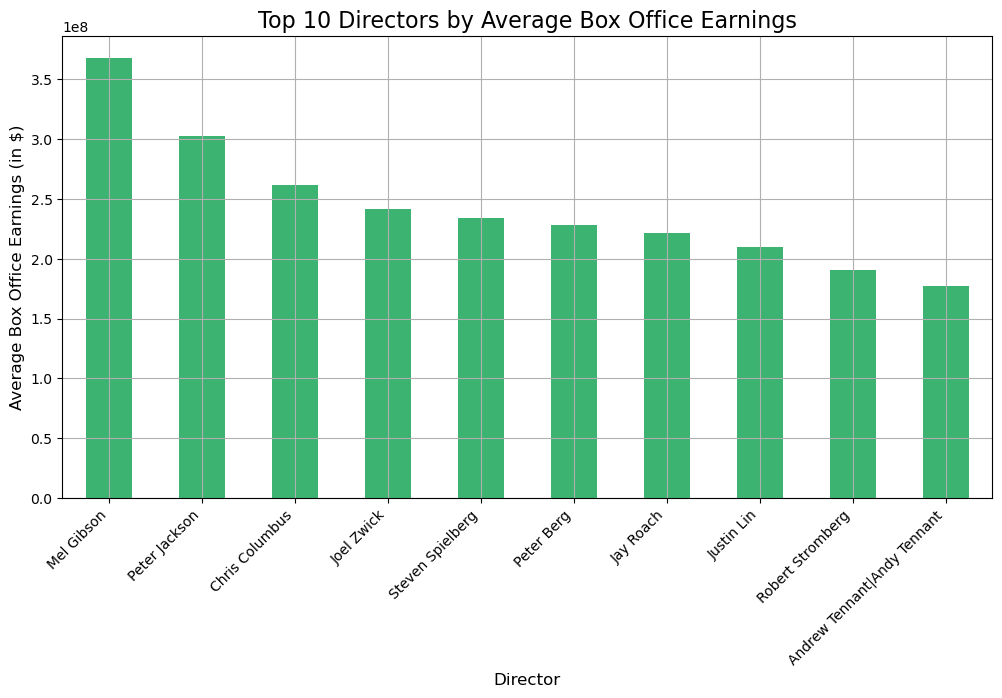

In [ ]:


# Plot the results (top 10 directors for better readability)
top_directors = director_box_office.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='mediumseagreen')

# Customize the plot
plt.title('Top 10 Directors by Average Box Office Earnings', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Average Box Office Earnings (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# WHICH STUDIO HAD THE HIGHEST BOX OFFICE EARNINGS?

In [ ]:
# Group by studio and calculate the average box office earnings
studio_box_office = df_clean.groupby('studio')['box_office'].mean().sort_values(ascending=False)

# Display the studios with the highest average box office earnings
print(studio_box_office.head())  # Display the top studios with the highest earnings


studio
Newmarket Film Group               201093893.5
Universal                          148734225.0
Sony Pictures/Columbia Pictures    146336178.0
DreamWorks SKG                     128579698.0
Paramount                          127490802.0
Name: box_office, dtype: float64


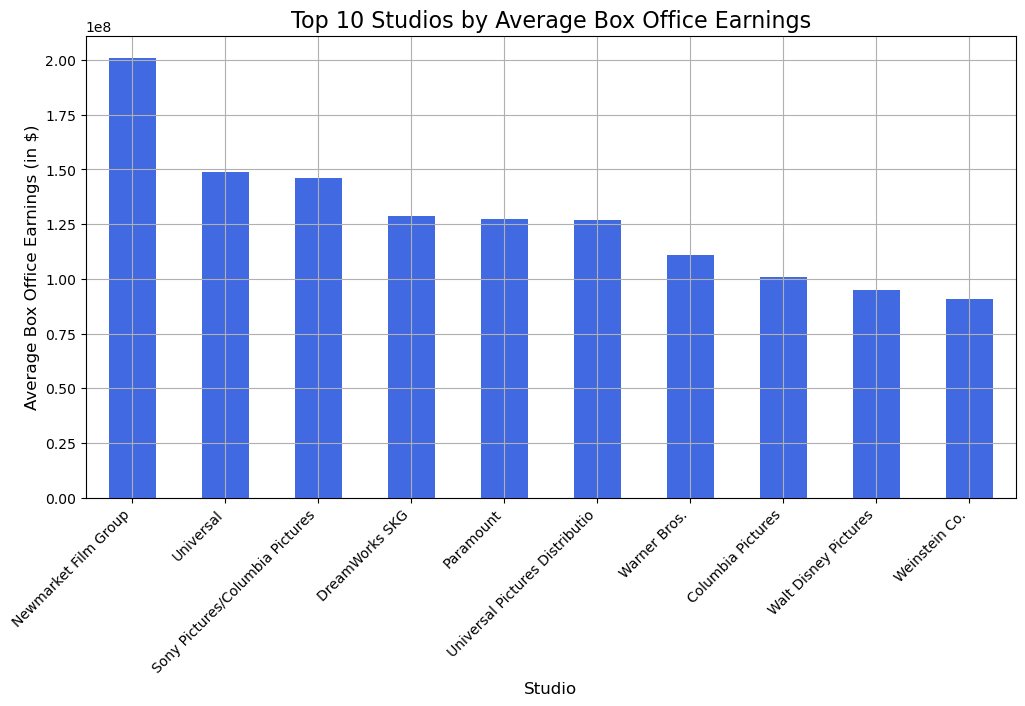

In [ ]:

# Plot the results (top 10 studios for better readability)
top_studios = studio_box_office.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_studios.plot(kind='bar', color='royalblue')

# Customize the plot
plt.title('Top 10 Studios by Average Box Office Earnings', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Average Box Office Earnings (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()
